# Physique de marché Lab3

## 0. Import the data and library


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import seaborn as sns
import pandas as pd

##  Gain de catégories d'investisseurs



## 1. Implementation the function. 

The decision of all agents are aggregated into the global quantity:
\begin{equation}
  A(t) = \sum_{i}^{} a_{i}(t) 
\end{equation}


In [ ]:
def GCMG(Ns=100, Np=700, P = 20, T = 4000, epsilon=0.01, iter_a_best = 0):
  a = np.random.choice((-1, 1),(Ns,P))
  #a = np.random.randint(-1,1, size=(Ns,P)) 
  #a[a==0] = 1
        
  Omega = np.random.normal(0,np.sqrt(Np),size=P)
  A_total = np.zeros(T)
  A_cond_total = np.zeros((T, P))
  U = np.zeros(Ns)
  mu_total = np.zeros((T, P)) 
        
  A_spec = np.zeros(T)
  G_spec = np.zeros(T) 
  G_cond_spec = np.zeros((T, P))
        
  G_prod = np.zeros(T) 
  G_cond_prod = np.zeros((T, P))
        
  a_best = np.zeros(P) 
  A_cond_a_best = np.zeros((T - iter_a_best, P))
  mu_a_best = np.zeros(P)

  naive_gain_best = []
  real_gain_best = []

  for t in range(int(T)):
    n = (U>0)
    mu_t = np.random.randint(0,P)
    mu_total[t, mu_t] += 1
              
    A_spec[t] = n@a[:,mu_t] + a_best[mu_t]
    A_total[t] = Omega[mu_t] + A_spec[t]
            
    G_spec[t] = - A_spec[t]*A_total[t]
    G_prod[t] = - Omega[mu_t]*A_total[t]
            
            
    A_cond_total[t, mu_t] = A_total[t]
    G_cond_spec[t,mu_t] = G_spec[t]
    G_cond_prod[t,mu_t] = G_prod[t]

    U -= a[:,mu_t]*A_total[t] - epsilon #score

    if iter_a_best != 0 and t >= iter_a_best:
        if t == iter_a_best:
            moyenne_A_cond_total = np.sum(A_cond_total, axis=0)/np.sum(mu_total,axis=0)
            a_best = - np.sign(moyenne_A_cond_total)
            naive_gain_best = (np.sum(np.abs(moyenne_A_cond_total)))/P
            A_cond_a_best[t-iter_a_best, mu_t] = A_total[t] + a_best[mu_t]
            mu_a_best[mu_t] += 1
        else:
            A_cond_a_best[t-iter_a_best, mu_t] = A_total[t] + a_best[mu_t]
            mu_a_best[mu_t] += 1

  gain_moy_spec = (np.sum(np.sum(G_cond_spec, axis=0)/np.sum(mu_total,axis=0)))/P
  gain_moy_prod = (np.sum(np.sum(G_cond_prod, axis=0)/np.sum(mu_total,axis=0)))/P

  moyenne_A_cond_total = np.sum(A_cond_total, axis=0)/np.sum(mu_total,axis=0)

  if iter_a_best != 0:
      real_gain_best = -(np.sum(a_best*(np.sum(A_cond_a_best, axis=0)/mu_a_best)))/P
  
  vol = np.var(A_total)
  sigma2 = vol/P
  H = np.mean(moyenne_A_cond_total ** 2) 

  return A_total, gain_moy_spec, gain_moy_prod, moyenne_A_cond_total, naive_gain_best, real_gain_best, vol, sigma2, H

In [ ]:
print(np.mean(GCMG(Ns=100, Np=700, P = 20, T = 4000, epsilon=0.01, iter_a_best = 0)[3] ** 2))
print(GCMG(Ns=100, Np=700, P = 20, T = 4000, epsilon=0.01, iter_a_best = 0)[8])

389.59359061858396
262.67145290457995


In [ ]:
def MA(data,days):
  res = np.zeros(len(data))
  for i in range(len(data)):
    if i < days:
      res[i]=np.nan
    else:
      res[i] = np.mean(data[i-days:i])
  return res

Text(0.5, 0, 'Time')

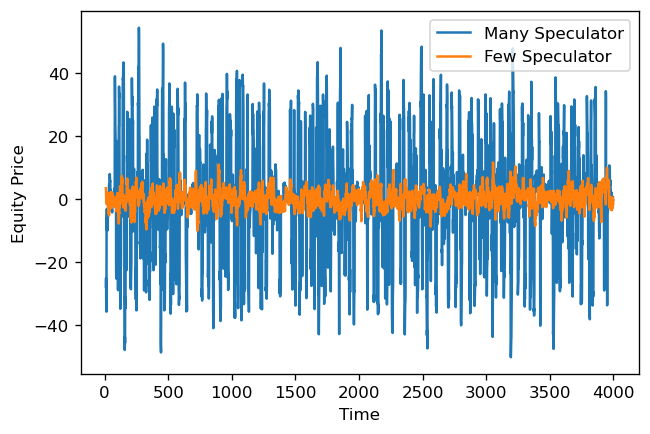

In [ ]:
plt.figure(dpi = 120)
MA(GCMG(Ns = 100, Np = 200, P = 20, T = 4000)[0],100)
plt.plot(MA(GCMG(Ns = 700, Np = 200, P = 20, T = 4000)[0],10),label='Many Speculator')
plt.plot(MA(GCMG(Ns = 100, Np = 200, P = 20, T = 4000)[0],10),label='Few Speculator')
plt.legend(loc='best')
plt.ylabel('Equity Price')
plt.xlabel('Time')


## 2. The rule of the parameters in the dynamic

1. Trouvez des parametres qui produisent des grandes fluctuations de A.
2. Varier Np. Est-ce qu’augmenter Np stabilise ou destabilise le marche ? Pourquoi?
3. Varier Ns. Est-ce qu’augmenter Ns stabilise ou destabilise le marche ? Pourquoi?
4. Varier ϵ. Est-ce que ce parametre stabilise ou destabilise le marche ?Pourquoi? Comment interpreter ce parametre ?

Text(0.5, 0, 'The number of speculators')

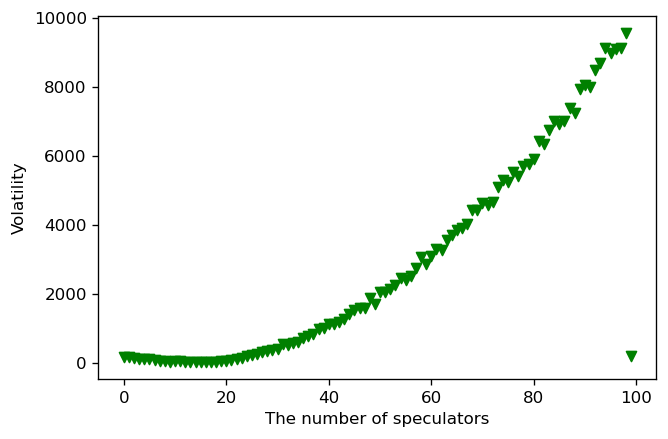

In [ ]:
vol = np.zeros(100)
x = np.arange(0,100,1)
vol_total = np.zeros((100,10))

for N in x:
  for i in range(0,10):
    vol_total[N-1][i] = GCMG(Ns = 10 * N, Np = 200, P = 20, T = 4000)[6]
  vol[N-1] = np.mean(vol_total[N-1])

plt.figure(dpi = 120)
plt.scatter(x,vol,c='green', marker='v')
plt.ylabel('Volatility')
plt.xlabel('The number of speculators')


Text(0.5, 0, 'The number of producers')

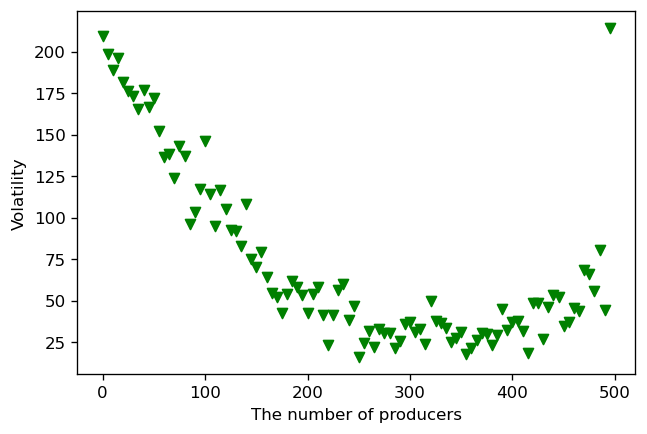

In [ ]:
vol = np.zeros(100)
x = np.arange(0,100,1)
vol_total = np.zeros((100,10))

for N in x:
  for i in range(0,10):    
    vol_total[N-1][i] = GCMG(Ns = 200, Np = N*5, P = 20, T = 4000)[6]
  vol[N-1] = np.mean(vol_total[N-1])

plt.figure(dpi = 120)
plt.scatter(x*5, vol, c='green', marker='v')
plt.ylabel('Volatility')
plt.xlabel('The number of producers')


Text(0.5, 0, 'The risk free return')

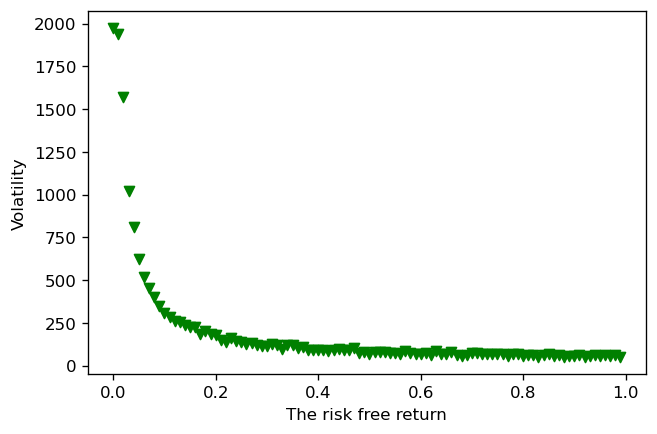

In [ ]:
vol = np.zeros(100)
x = np.arange(0,100,1)
y = np.arange(0,1,0.01)
vol_total = np.zeros((100,10))

for N in x:
  for i in range(0,10):
    vol_total[N-1][i] = GCMG(Np = 200, Ns = 500, P=20, epsilon=y[N-1])[6]
  vol[N-1] = np.mean(vol_total[N-1])

plt.figure(dpi = 120)
plt.scatter(y,vol, c='green', marker='v')
plt.ylabel('Volatility')
plt.xlabel('The risk free return')

## 3. Dynamique de la prévisibilité.

###3.1. Calculate H and $σ^2$
Based on the formula: 

$H = \frac{1}{N_sP} E(A|\mu )^2 = \overline{E(A|\mu)^2}$


<ipython-input-2-32a8e74e3ae1>:55: RuntimeWarning: invalid value encountered in true_divide
  gain_moy_spec = (np.sum(np.sum(G_cond_spec, axis=0)/np.sum(mu_total,axis=0)))/P
<ipython-input-2-32a8e74e3ae1>:56: RuntimeWarning: invalid value encountered in true_divide
  gain_moy_prod = (np.sum(np.sum(G_cond_prod, axis=0)/np.sum(mu_total,axis=0)))/P
<ipython-input-2-32a8e74e3ae1>:58: RuntimeWarning: invalid value encountered in true_divide
  moyenne_A_cond_total = np.sum(A_cond_total, axis=0)/np.sum(mu_total,axis=0)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  r

Text(0.5, 0, 'T')

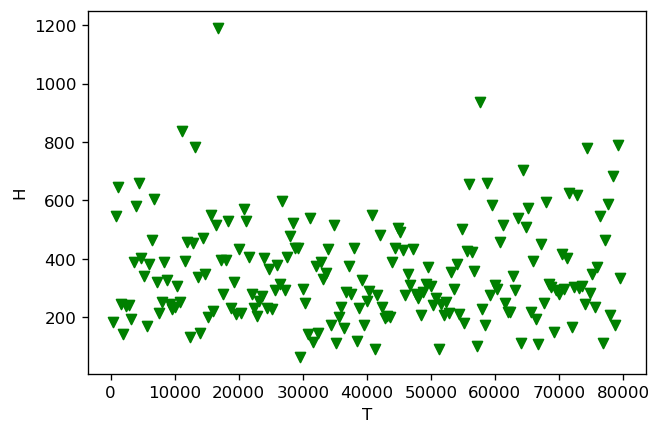

In [ ]:
x = np.arange(0,800,4)
y = np.zeros(200)

for i in range(len(x)):
  y[i] = GCMG(Ns=100, Np=700, P = 20, T = i*100, epsilon=0.01, iter_a_best = 0)[8]

plt.figure(dpi = 120)
plt.scatter(x*100, y, c='green', marker='v')
plt.ylabel('H')
plt.xlabel('T')

###3.3 The condition for volatility explosure

Text(0.5, 0, 'ns')

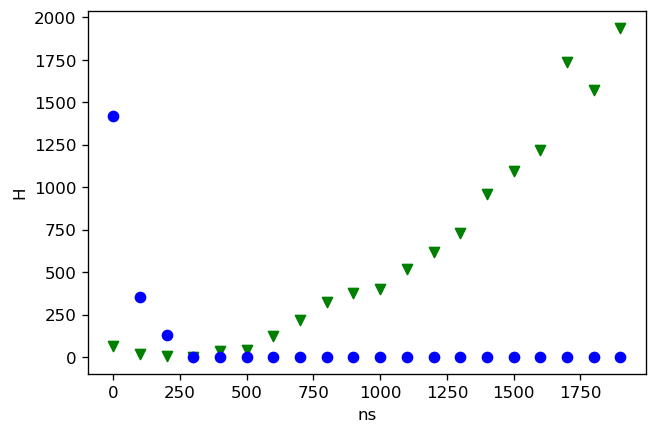

In [ ]:
x = np.arange(0,20,1)
sigma2 = np.zeros(20)
H = np.zeros(20)

for i in range(len(x)):
  res = GCMG(Ns= i * 100, Np=700, P = 20, T = 4000, epsilon=0.01, iter_a_best = 0)
  sigma2[i] = res[7]
  H[i] = res[8]

plt.figure(dpi = 120)
plt.scatter(x*100, sigma2, c='green', marker='v')
plt.scatter(x*100, H, c='blue', marker='o')
plt.ylabel('H')
plt.xlabel('ns')


# TP 3.3 gain and impact of the market

## 1. The return for different investors.

1.1 Calculate the average return of the 2 types of the investors with the increase of the speculators.

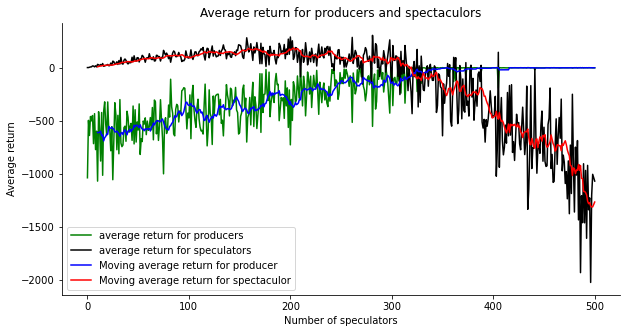

In [ ]:
x = np.linspace(0,500,500).astype("int")

Gain_moy_prod = np.zeros(len(x))
Gain_moy_spec= np.zeros(len(x))

for i in range(len(x)):
    res = GCMG(Ns = x[i], P=20, Np=700, epsilon=0.01)
    Gain_moy_prod[i] = res[2]
    Gain_moy_spec[i] = res[1]
    
ma_prod = MA(Gain_moy_prod,10)
ma_spec = MA(Gain_moy_spec,10)

fig, ax = plt.subplots(figsize=(10,5))
sns.despine()
ax.set_title("Average return for producers and spectaculors")
ax.set_xlabel("Number of speculators")
ax.set_ylabel("Average return")
ax.plot(x, Gain_moy_prod, color="green", label="average return for producers")
ax.plot(x, Gain_moy_spec, color="black", label="average return for speculators")
ax.plot(x, ma_prod, color="blue", label = "Moving average return for producer")
ax.plot(x, ma_spec, color="red", label = "Moving average return for spectaculor")

ax.legend()
plt.show()

1.2 Calculate the average return with the increase of the producers.

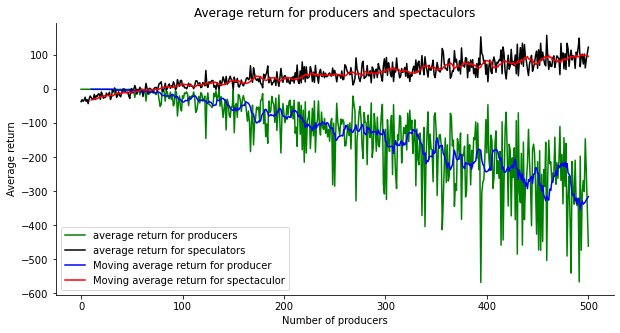

In [ ]:
x = np.linspace(0,500,500).astype("int")

Gain_moy_prod= np.zeros(len(x))
Gain_moy_spec = np.zeros(len(x))

for i in range(len(x)):
    res = GCMG(Ns = 100, P=20, Np=x[i], epsilon=0.01)
    Gain_moy_prod[i] = res[2]
    Gain_moy_spec[i] = res[1]

ma_prod = MA(Gain_moy_prod,10)
ma_spec = MA(Gain_moy_spec,10)

fig, ax = plt.subplots(figsize=(10,5))
sns.despine()
ax.set_title("Average return for producers and spectaculors")
ax.set_xlabel("Number of producers")
ax.set_ylabel("Average return")
ax.plot(x, Gain_moy_prod, color="green", label="average return for producers")
ax.plot(x, Gain_moy_spec, color="black", label="average return for speculators")
ax.plot(x, ma_prod, color="blue", label = "Moving average return for producer")
ax.plot(x, ma_spec, color="red", label = "Moving average return for spectaculor")

ax.legend()
plt.show()

1.3 How to comment?

## 2 Gain real, gain expected

### 1. Calculate the conditional average for one realization of the game.
In our case, we choose M = 2, so μ=(2^2)=4. And we set $N_s = 8$, $N_p = 4$, the result is in below.

In [ ]:
moyenne_A_cond_total = GCMG(200, 200, P = 20, T = 4000)[3]
print(f"the conditional average retur is: {moyenne_A_cond_total}")

the conditional average retur is: [-0.08237625  0.03768416  0.01325758 -0.02666939  0.00161682  0.10567466
 -0.08687737  0.10960207  0.09622148 -0.0051663   0.07816137 -0.07183034
 -0.15433486  0.0491049  -0.03361904  0.05467302  0.00336853  0.05474322
 -0.00406307 -0.02657827]


### 2. Add a agent who understands all the game and have the possibility to play with the best strategy.

In [ ]:
dif_reel_espere = np.zeros(1000)

for i in range(1000):
    res = GCMG(Ns=200, Np=200, P=10, epsilon=0.01, iter_a_best=1000)
    dif_reel_espere[i] = res[5] - res[4]
print(f"The average difference between the average return of the best agent and expected return is:{np.average(dif_reel_espere)}")

The average difference between the average return of the best agent and expected return is:-1.1339463632414433
